In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle

In [2]:
base_risco_credit = pd.read_csv('risco_credito.csv')
base_risco_credit

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [3]:
X_risco_credit = base_risco_credit.iloc[:, 0:4].values
y_risco_credit = base_risco_credit.iloc[:, 4].values

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

X_risco_credit[:, 0] = label_encoder_historia.fit_transform(X_risco_credit[:, 0])
X_risco_credit[:, 1] = label_encoder_divida.fit_transform(X_risco_credit[:, 1])
X_risco_credit[:, 2] = label_encoder_garantia.fit_transform(X_risco_credit[:, 2])
X_risco_credit[:, 3] = label_encoder_renda.fit_transform(X_risco_credit[:, 3])

import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credit, y_risco_credit], f)

In [4]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credit, y_risco_credit)

GaussianNB()

In [5]:
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

## Base credit data

In [6]:
with open('credit.pkl', 'rb') as f:
    X_credit_treino, y_credit_treino, X_credit_teste, y_credit_teste = pickle.load(f)

In [7]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treino, y_credit_treino)

previsoes = naive_credit_data.predict(X_credit_teste)
print(previsoes)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [8]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [9]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

0.938

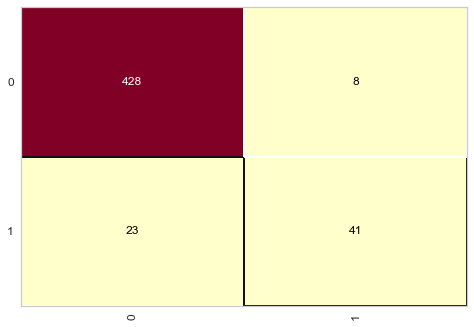

In [11]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treino, y_credit_treino)
cm.score(X_credit_teste, y_credit_teste)

In [13]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base  Census

In [15]:
with open('census.pkl', 'rb') as f:
    X_census_treino, y_census_treino, X_census_teste, y_census_teste = pickle.load(f)

naive_census = GaussianNB()
naive_census.fit(X_census_treino, y_census_treino)
previsaos = naive_census.predict(X_census_teste)
previsaos

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [16]:
accuracy_score(y_census_teste, previsaos)

0.4767656090071648

0.4767656090071648

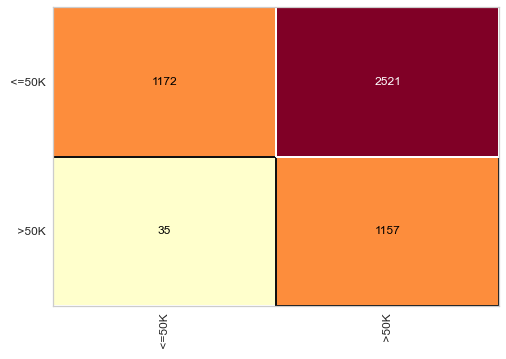

In [17]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treino, y_census_treino)
cm.score(X_census_teste, y_census_teste)